<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv("boston_housing.csv")

In [14]:
boston_df.shape

(506, 14)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### For the "Median value of owner-occupied homes" provide a boxplot

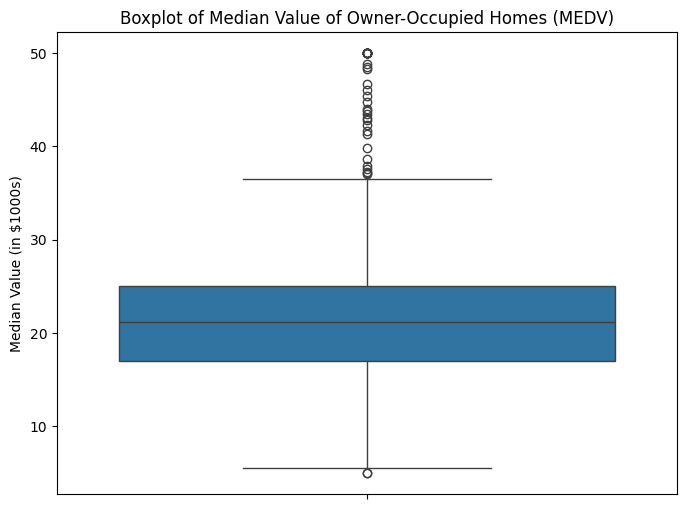

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=boston_df, y='MEDV')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (in $1000s)')
plt.show()

### we can see that there are various outliers below the first quartile. The Median as per the BoxPlot is shown in the plot as approximately 21 or 22.

## Provide a  bar plot for the Charles river variable

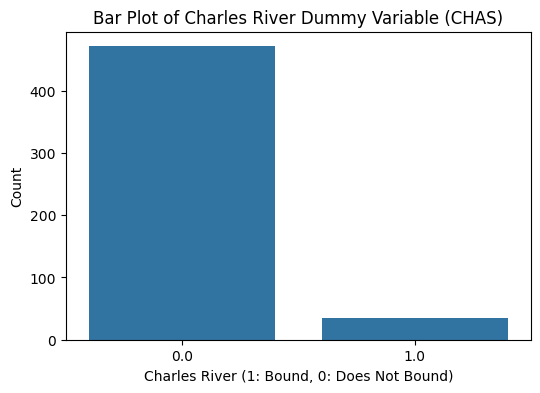

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Dummy Variable (CHAS)')
plt.xlabel('Charles River (1: Bound, 0: Does Not Bound)')
plt.ylabel('Count')
plt.show()

####  Majority of the data belongs to River Bound

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

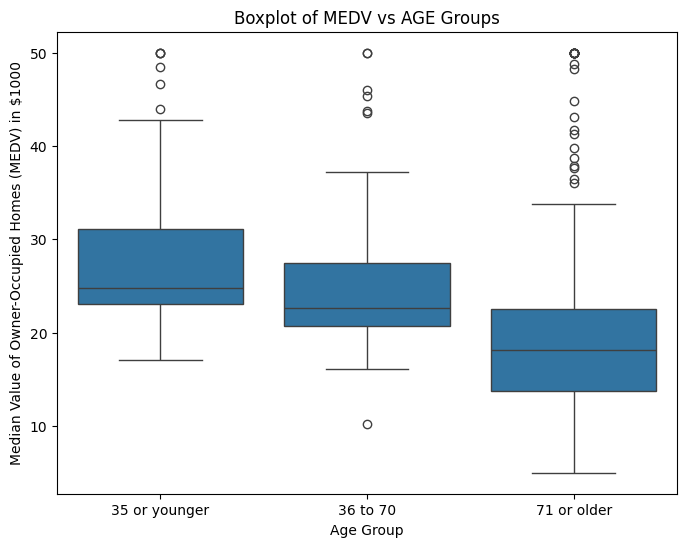

In [19]:
age_bins = [0, 35, 70, float('inf')] 
age_labels = ['35 or younger', '36 to 70', '71 or older']  
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, right=False)


plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV) in $1000')
plt.show()

####  The Median for the group "35 years and younger" is approximately 25, for "70 years and older" the Median is approximately 19 and for "Between 35 and 70 years" group the Median is approximately 22.

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

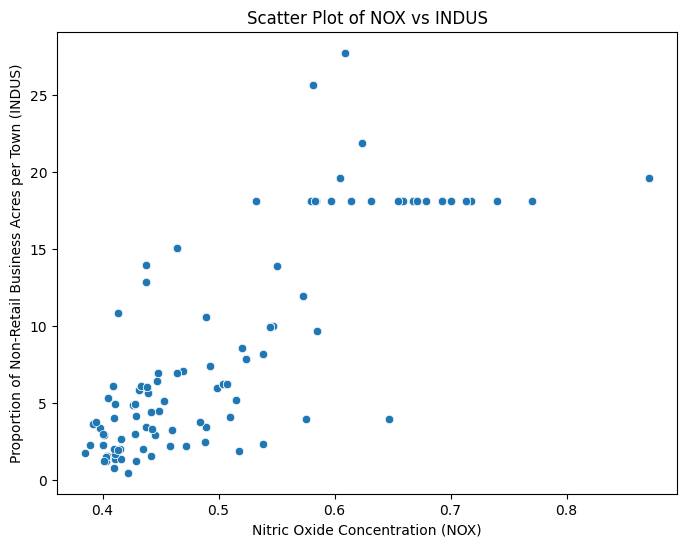

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.show()

#### The Scatter Plot shows that there is a high correlation or positive correlation between the Nitric Oxides concentration (parts per 10 million) and Proportion of non-retail business acres per town as there is a near linear relationship between both of them.

### Create a histogram for the pupil to teacher ratio variable

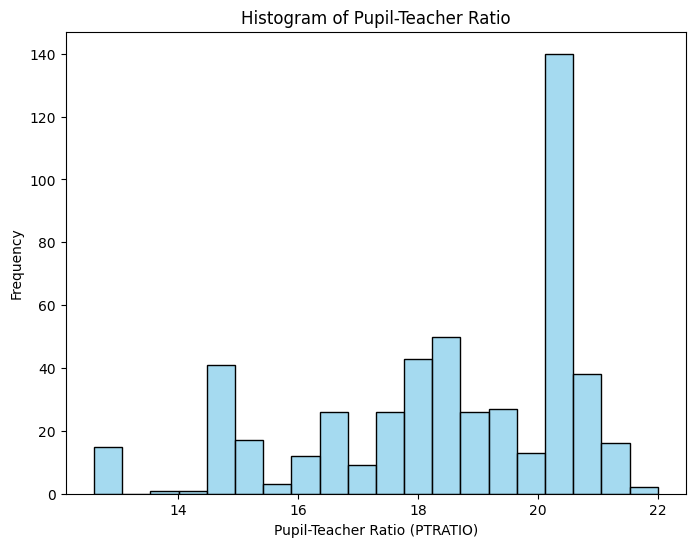

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=False, bins=20, color='skyblue')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

 #### The highest corresponds to the 20 - 22 bin group. We can also see that the distribution is skewed to the left as the tail of the histogram is towards the 12 on the x-axis. This is called as the Negative-skewed Distribution.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [26]:
import scipy.stats as stats


group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_2 = boston_df[boston_df['CHAS'] == 0]['MEDV']


t_stat, p_value = stats.ttest_ind(group_1, group_2)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in the median value of houses between the two groups (bounded by Charles River and not).")
else:
    print("There is no significant difference in the median value of houses between the two groups.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in the median value of houses between the two groups (bounded by Charles River and not).


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [31]:
import numpy as np

bins = [0, 35, 70, np.inf]
labels = ['35 and younger', '35-70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)


f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['AGE_group'] == '35 and younger']['MEDV'],
    boston_df[boston_df['AGE_group'] == '35-70']['MEDV'],
    boston_df[boston_df['AGE_group'] == '70 and older']['MEDV']
)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in the median value of houses across the different age groups.")
else:
    print("There is no significant difference in the median value of houses across the different age groups.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
There is a significant difference in the median value of houses across the different age groups.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [34]:

from scipy.stats import pearsonr


correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])


print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


if p_value < 0.05:
    print("There is a statistically significant relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is no statistically significant relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.")


Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a statistically significant relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [36]:
import statsmodels.api as sm
X = boston_df['DIS'] 
y = boston_df['MEDV']  
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        20:01:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0